# Automobile Data Set
This machine learning task will be covering the following steps.

**1. Data Preprocessing**

**2. Missing Value Imputation**

**3. Model Building**

#1. Data Preprocessing

### Importing libraries and data

I have used Google Colab for this machine learning task.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing data and adding headers

In [3]:
#adding header as indicated in the data description
col_names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
          'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cyclinders',
          'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg',
          'highway-mpg','price']

#import data
data =  pd.read_csv('/content/drive/MyDrive/imports-85.data', sep=",", header=None, names=col_names)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


###Data Handling



The data description says there are some '?' symbols in the data set, which indicates there are some missing values in it.

Before we jump into this dataset deeply, let's look at general information regarding the dataset.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cyclinders  205 non-null    object 
 16  engine-size        205 non

First of all, It looks like there is no null values in the dataset;however, it is understandable as '?' symbol will not be counted as null.

Secondly, it shows some data types of the variables are different from what I saw in the data description. 
(such as normalized-losses, price, horsepower and so on)
It seems to me that it is also because of '?' symbols in the columns mentioned above.

Therefore, I will need to replace '?' symbols to nan and count the number of nan afterwards.

In [5]:
#Replacing '?' symbols to nan and counting the number of nan afterwards
data = data.replace('?', np.nan)
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cyclinders     0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
#After convering '?' symbols to nan, we see some differences in null count as below.  
#column number 1,5,18,19,21,22,25
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cyclinders  205 non-null    object 
 16  engine-size        205 non

Now, we can see that there are missing values in the dataset. However, it still shows some differences in data types. Some of the variables (such as bore, stroke, horsepower and so on) should be the float type but their types are object. Therefore, we need to convert them manually.

In [7]:
# converting each mistyped columns to float
    
data["bore"] = data["bore"].astype(np.float64)
data["stroke"] = data["stroke"].astype(np.float64)
data["horsepower"] = data["horsepower"].astype(np.float64)
data["peak-rpm"] = data["peak-rpm"].astype(np.float64)
data["normalized-losses"] = data["normalized-losses"].astype(np.float64)
data["price"] = data["price"].astype(np.float64)

Now we can see that the columns have been successfully converted to float as below. (normalized-losses, bore, stroke, horsepower, peak-rpm  and price)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cyclinders  205 non-null    object 
 16  engine-size        205 non

And let's see if only categorical variables remained object

In [9]:
data.select_dtypes(include = 'object').head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cyclinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


It seems like 'num-of-doors' and 'num of cyclinders' can be converted to int as they are numeric values (two, four ...).

In [10]:
data['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [11]:
data['num-of-cyclinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [12]:
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('two','2')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('three','3')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('four','4')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('five','5')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('six','6')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('eight','8')
data['num-of-cyclinders']=data['num-of-cyclinders'].str.replace('twelve','12')
data['num-of-cyclinders']=data['num-of-cyclinders'].astype('int64')

'num-of-cyclinders' has been converted to int but I will convert 'num-of-doors' after I impute missing values in it.

#2. Missing Value Imputation

Instead of imputing simply by mean, I would like to investigate in each variable first, so that I have a better idea as to how to impute them manually.

### 'num-of-doors'

In [13]:
#nan for the column, 'num-of-doors'
data[data['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,4,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,4,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


Since the body-style of the two cars is sedan, I think I can impute num-of-doors as four, as seen from the graph below

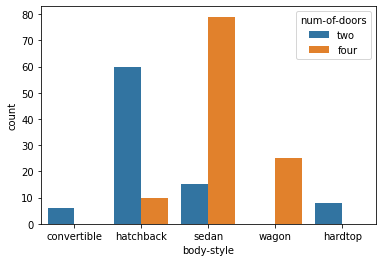

In [14]:
#plotting body-style vs num of doors
sns.countplot(data=data, x='body-style', hue='num-of-doors')
data['num-of-doors'].fillna('four', inplace = True)

data['num-of-doors']=data['num-of-doors'].str.replace('two','2')
data['num-of-doors']=data['num-of-doors'].str.replace('four','4')
data['num-of-doors']=data['num-of-doors'].astype('int64')

###Correlation plot

For other missing values that are supposed to be numeric,
I can use correlation plot which I can refer to when imputing.

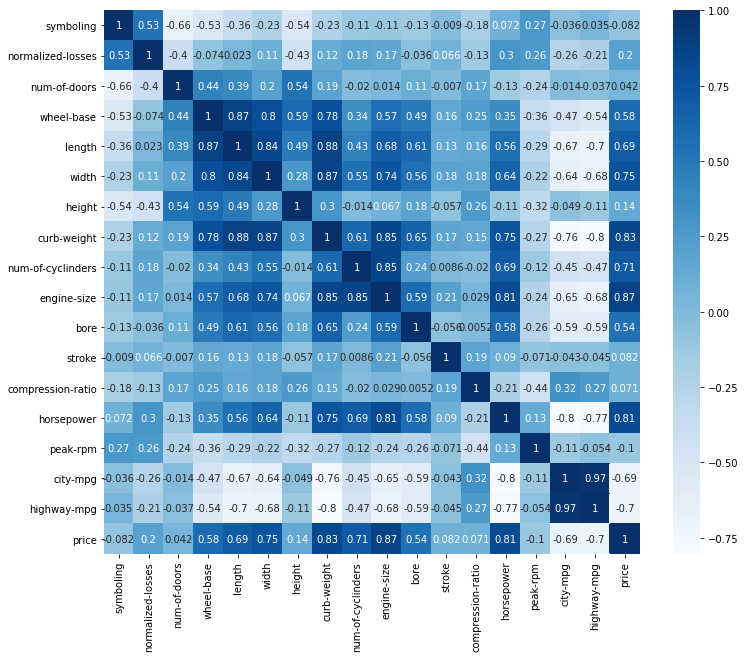

In [15]:
plt.figure(figsize=(12,10))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.show() 

###'bore'

In [16]:
#bore
data[data['bore'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


Since bore is correlated to curb-weight and engine-size(top two), I will look into the correlations by making plots.

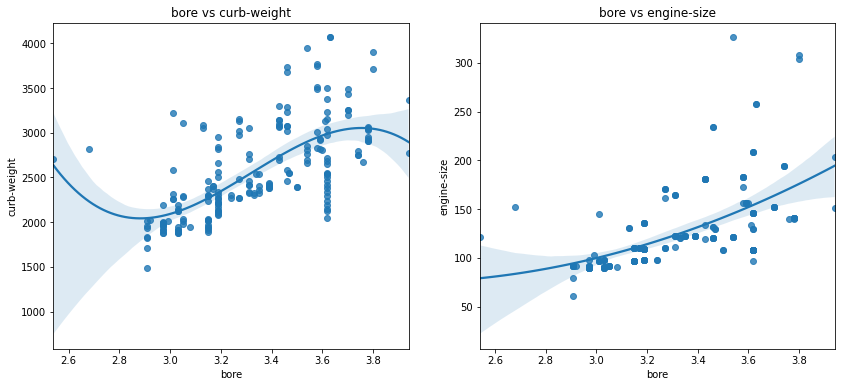

In [17]:
#plot the correlations
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='bore',y='curb-weight', order = 3)
plt.title('bore vs curb-weight')
plt.subplot(1,2,2)
sns.regplot(data=data, x='bore',y='engine-size', order = 2)
plt.title('bore vs engine-size');



It looks like the second graph shows a better correlation to interpret. As shown below, for engine-size around 70 and 80, bore is around 2.9

In [18]:
data[data['engine-size'].between(70,80)]['bore'].mean()

2.91

Therefore, I will imput missing values with 2.91

In [19]:
data['bore'].fillna(2.91, inplace = True)

###'stroke'

In [20]:
data[data['stroke'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.91,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.91,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,2.91,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,2.91,NaN,9.4,135.0,6000.0,16,23,15645.0


Since stroke is correlated to compression-ratio and engine-size, (top two), I will look into the correlations.

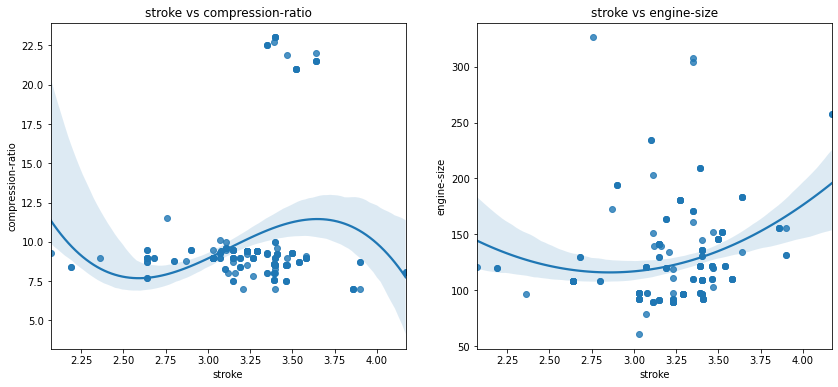

In [21]:
#plot the correlations
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='stroke',y='compression-ratio', order = 3)
plt.title('stroke vs compression-ratio')
plt.subplot(1,2,2)
sns.regplot(data=data, x='stroke',y='engine-size', order = 2)
plt.title('stroke vs engine-size');

It looks like the second graph shows a better correlation to interpret. As shown below, it looks like stroke is around 3.0 for engine-size around 70 and 80.

In [22]:
data[data['engine-size'].between(70,80)]['stroke'].mean()

3.07

Therefore, I will imput missing values with 3.07

In [23]:
data['stroke'].fillna(3.07, inplace = True)

###'horsepower'

In [24]:
data[data['horsepower'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,4,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


Since horsepower is highly correlated to price and engine-size, I will look into the correlations

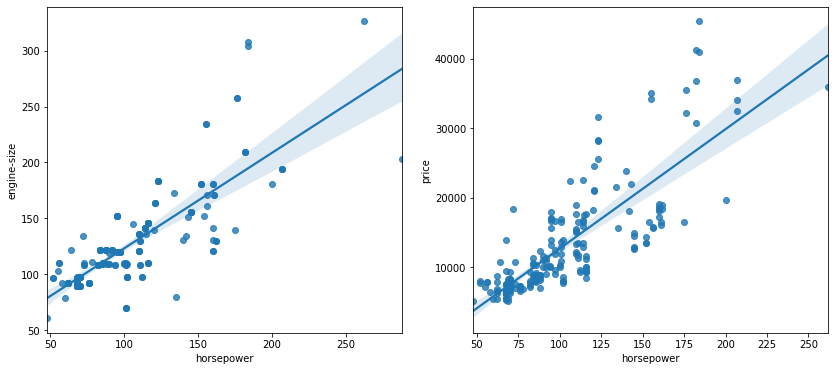

In [25]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='horsepower',y='engine-size')
plt.subplot(1,2,2)
sns.regplot(data=data, x='horsepower',y='price');

It seems to me that horsepower is around 132 for engine-size 132 and horsepower is around 100 for price around 9295~9895 as below.

In [26]:
data[data['engine-size'].between(130,134)]['horsepower'].mean()

132.5

In [27]:
data[data['price'].between(9295,9895)]['horsepower'].mean()

101.0

Since both variable(engine-size, price) have correlations to horsepower, I would like to impute the value '116.5' into the missing data since '116' is in the middle of 132 and 101

In [28]:
data['horsepower'].fillna(116.5, inplace = True)

###'peak-rpm'

In [29]:
#Peak RPM

data[data['peak-rpm'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cyclinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,4,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.9,8.7,116.5,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.9,8.7,116.5,NaN,23,31,9895.0


Based on the correlation plot above, it seems like this factor is somehow correlated to compression-ratio or wheel-base

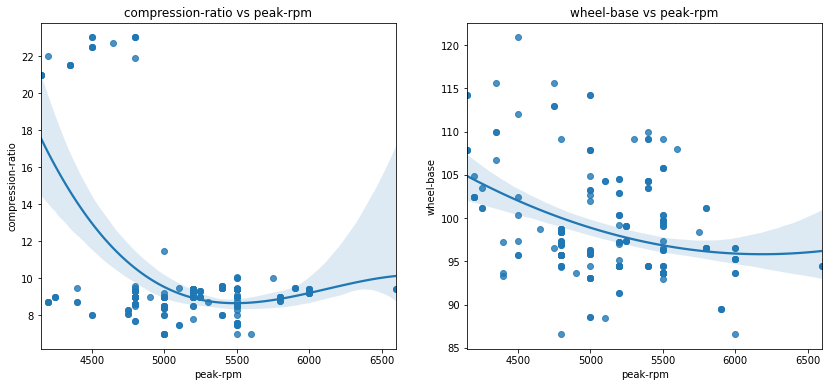

In [30]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=data, x='peak-rpm',y='compression-ratio', order = 3)
plt.title('compression-ratio vs peak-rpm')
plt.subplot(1,2,2)
sns.regplot(data=data, x='peak-rpm',y='wheel-base', order = 2)
plt.title('wheel-base vs peak-rpm');

In [31]:
data[data['compression-ratio'].between(8.5,8.9)]['peak-rpm'].mean()

5006.896551724138

In [32]:
data[data['wheel-base'].between(95,97)]['peak-rpm'].mean()

5176.666666666667

Since both variable(compression-ratio, wheel-base) have correlations to horsepower, I would like to impute '5091' into the missing data since '5091' is in the middle of 5006 and 5176

In [33]:
data['peak-rpm'].fillna(5091, inplace = True)

Also, before I impute 'normalized-losses', I would like to see if there is any sign of outliers in the dataset. It is great to see there is no clear indication of outliers as below.

In [34]:
data.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cyclinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.321561,3.251805,10.142537,104.37561,5125.034146,25.219512,30.751220,13207.129353
std,1.245307,35.442168,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.277026,0.314649,3.972040,39.53762,476.991115,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.00000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.130000,3.100000,8.600000,70.00000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.00000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.50000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.00000,6600.000000,49.000000,54.000000,45400.000000


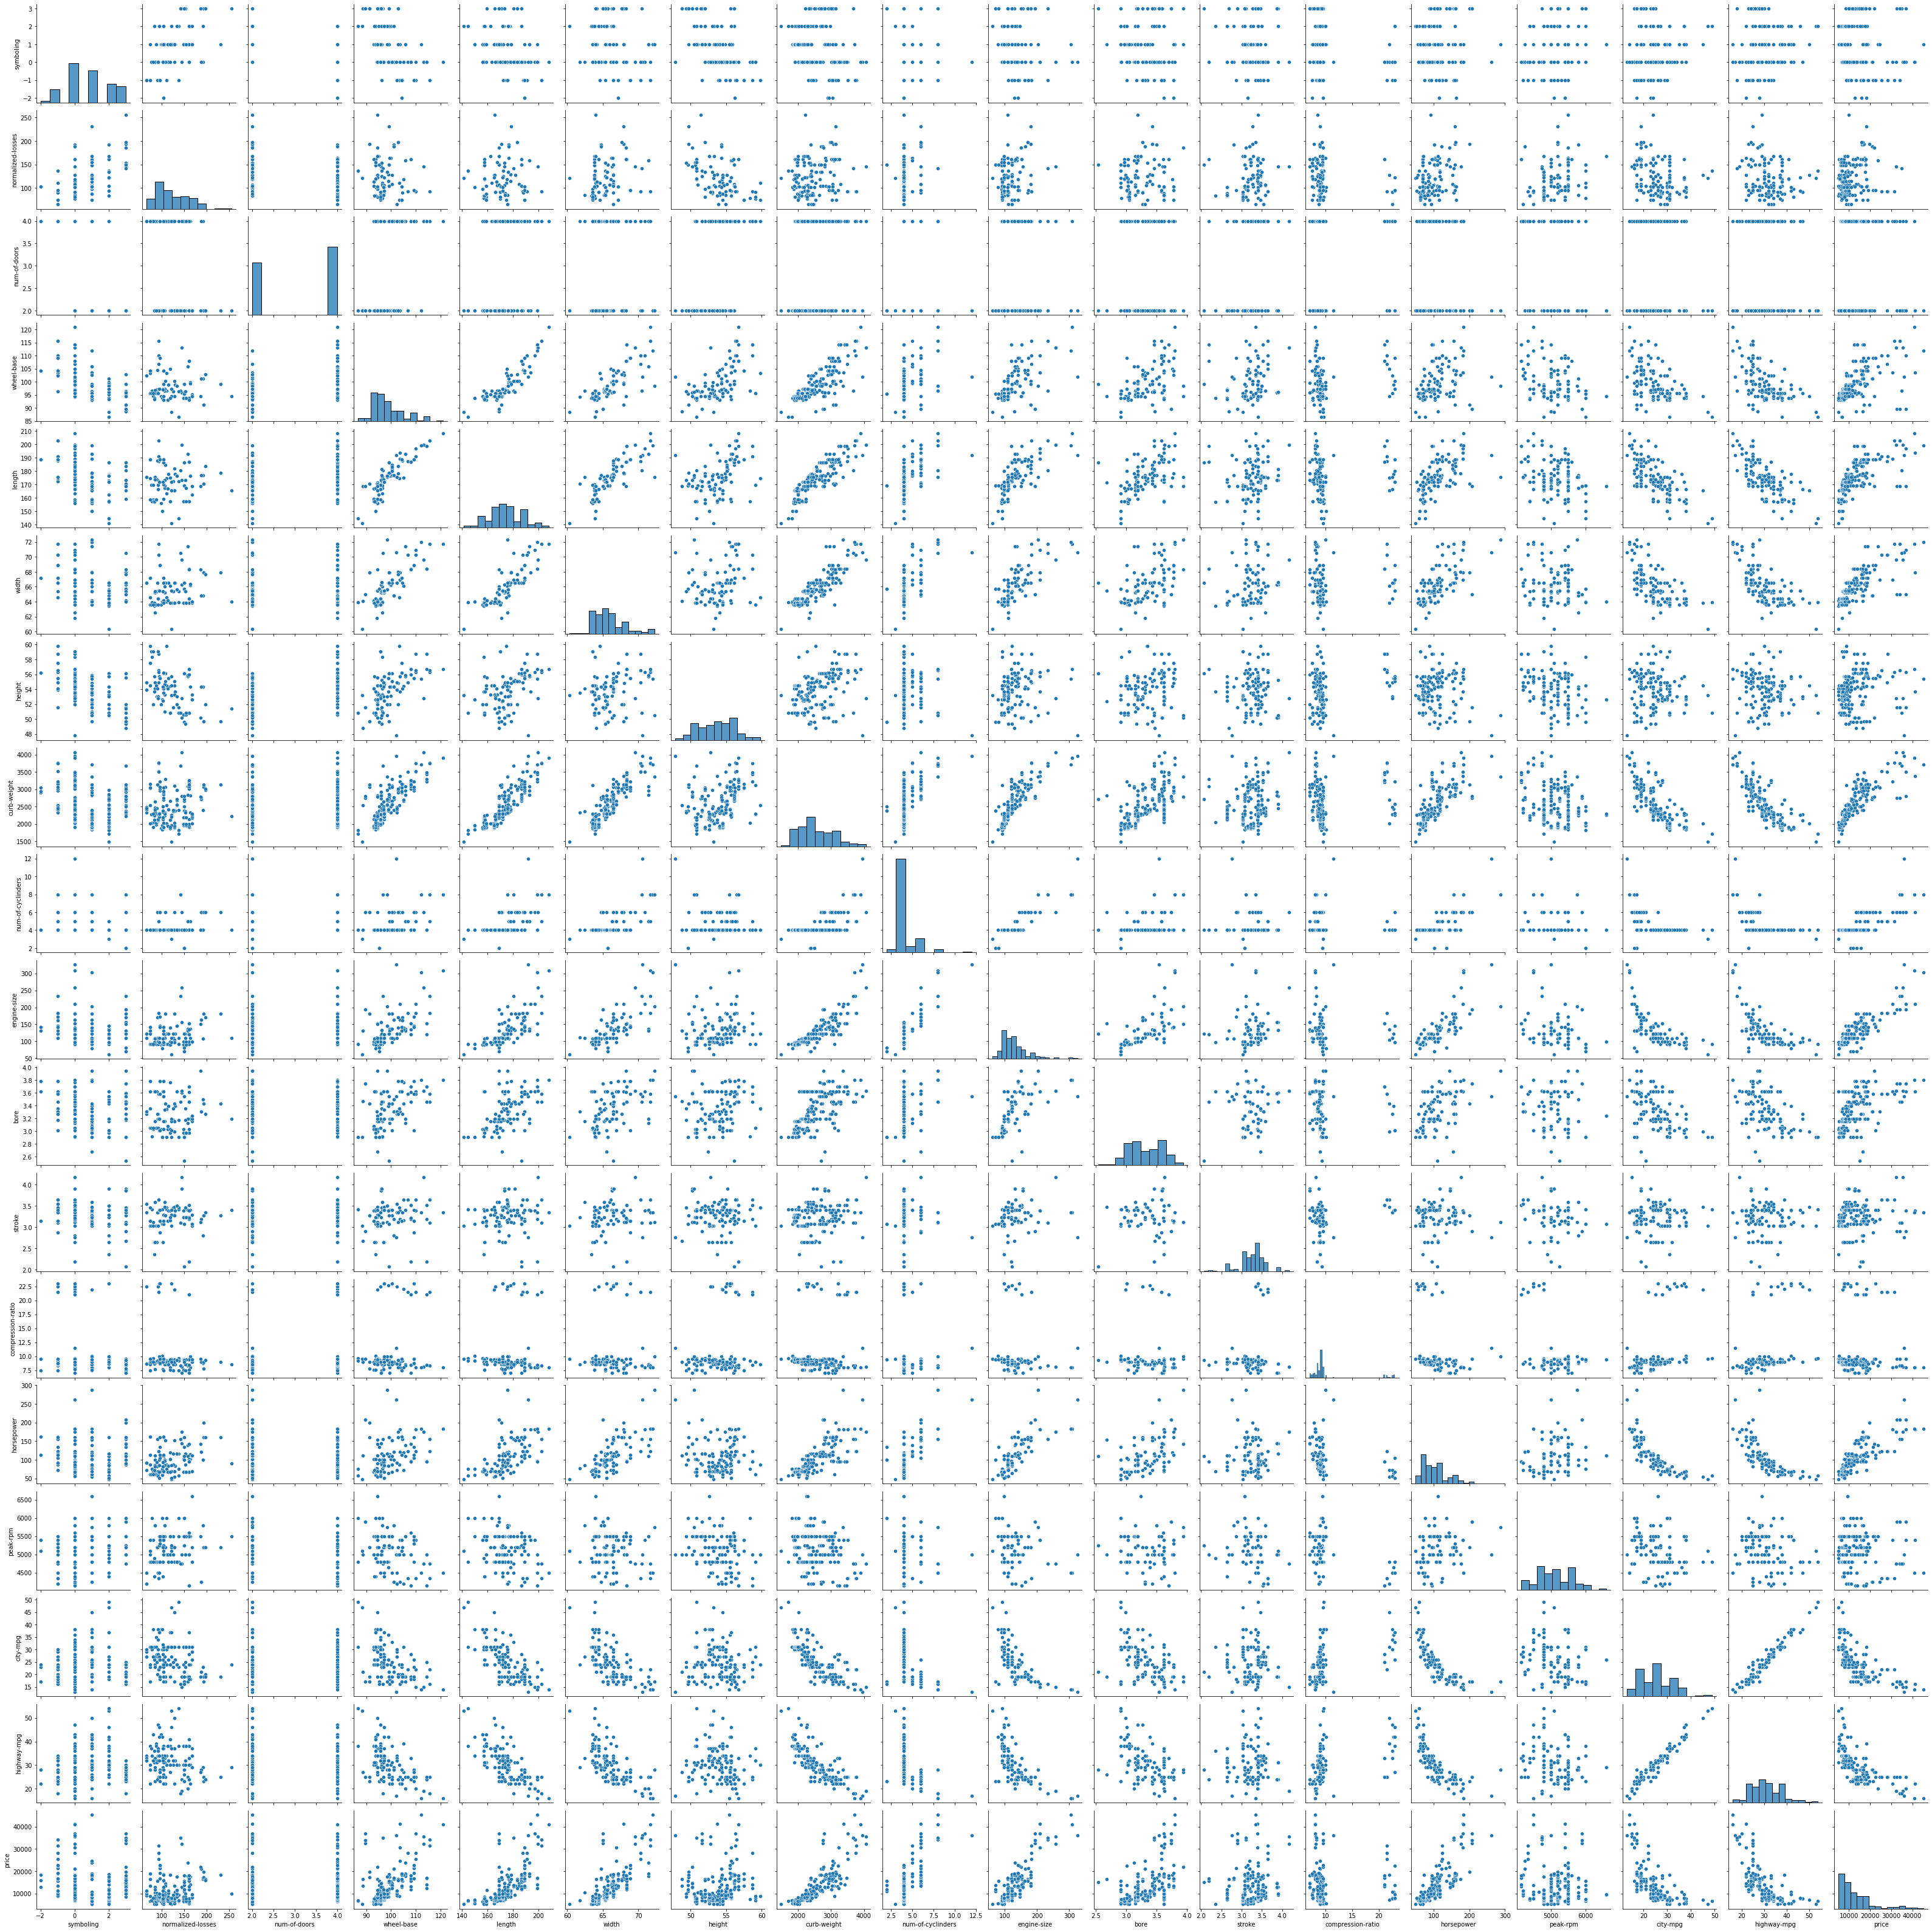

In [35]:
sns.pairplot(data)
plt.show() 

###'normalized-losses'

Now we have only one variable with missing values, which is normalized-losses.
Since there are more than 40 missing values in the variable, and that is around one fifth of the dataset, I think it is a better idea to impute the values with a simple linear regression model

Before I build a regression model, I will create dummy variables for the categorical features.

In [36]:
# Encoding the categorical features
    
categorical_columns = ['make','fuel-type','aspiration', 'body-style', 'drive-wheels',
                       'engine-location', 'engine-type', 'fuel-system'] 
    
for column in categorical_columns:
  dummies = pd.get_dummies(data[column], prefix=column)
  data = pd.concat([data, dummies], axis=1)
  data = data.drop(column, axis=1)

Since it is required in the task, I will drop data samples with missing values in the target as below (the number of missing values in the target is 4). So we have 201 rows. (205 - 4)

In [37]:
#skipping data sample with missing values in the target
data = data[data.price.notna()]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               201 non-null    int64  
 1   normalized-losses       164 non-null    float64
 2   num-of-doors            201 non-null    int64  
 3   wheel-base              201 non-null    float64
 4   length                  201 non-null    float64
 5   width                   201 non-null    float64
 6   height                  201 non-null    float64
 7   curb-weight             201 non-null    int64  
 8   num-of-cyclinders       201 non-null    int64  
 9   engine-size             201 non-null    int64  
 10  bore                    201 non-null    float64
 11  stroke                  201 non-null    float64
 12  compression-ratio       201 non-null    float64
 13  horsepower              201 non-null    float64
 14  peak-rpm                201 non-null    fl

Train data will be the rows without missing values and test data will be the rows with missing values

In [39]:
train=data[data['normalized-losses'].notna()]
train_x = train.drop('normalized-losses',1)
train_y = train['normalized-losses']
test=data[data['normalized-losses'].isna()]
test_x = test.drop('normalized-losses',1)

I will fit a linear regression model and impute the missing values with the results from the model

In [40]:
lm = LinearRegression().fit(train_x,train_y)

In [41]:
data.loc[data['normalized-losses'].isna(),'normalized-losses'] = lm.predict(test_x)

Now we can see a clean dataset without any nans.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               201 non-null    int64  
 1   normalized-losses       201 non-null    float64
 2   num-of-doors            201 non-null    int64  
 3   wheel-base              201 non-null    float64
 4   length                  201 non-null    float64
 5   width                   201 non-null    float64
 6   height                  201 non-null    float64
 7   curb-weight             201 non-null    int64  
 8   num-of-cyclinders       201 non-null    int64  
 9   engine-size             201 non-null    int64  
 10  bore                    201 non-null    float64
 11  stroke                  201 non-null    float64
 12  compression-ratio       201 non-null    float64
 13  horsepower              201 non-null    float64
 14  peak-rpm                201 non-null    fl

#3. Building a model

###Removing Multicorllinearity

Before I begin, I will need to investigate further into the dataset so that I find multicollinearity if any.

In [43]:
def vif_examine(df):
  # the independent variables set 
  X = df.select_dtypes(include = ["float64","int64"])
  
  # VIF dataframe 
  vif_data = pd.DataFrame() 
  vif_data["feature"] = X.columns 
  
  # calculating VIF for each feature 
  vif_data["VIF"] = [vif(X.values, i) for i in range(len(X.columns))] 
  print(vif_data)

In [44]:
vif_examine(data)

              feature          VIF
0           symboling     4.716602
1   normalized-losses    25.160625
2        num-of-doors    26.307542
3          wheel-base  2548.684877
4              length  2118.447451
5               width  3642.773100
6              height  1133.408624
7         curb-weight   440.302600
8   num-of-cyclinders   188.462016
9         engine-size   339.518066
10               bore   516.979195
11             stroke   206.592284
12  compression-ratio    17.628655
13         horsepower    84.241341
14           peak-rpm   237.251715
15           city-mpg   485.327902
16        highway-mpg   562.874359
17              price    26.778016


It looks like length, width and height have high VIF scores. Therefore, I can merge them into one as volume and drop the three columns from the dataset.

In [45]:
data['volume'] = data['length']*data['width']*data['height']
data=data.drop(['length','width','height'], axis = 1)

### Building models without PCA

PCA is known for extracting the directions in the multivariate space that is the “most informative”. I will compare the results with and without PCA.

Train and test data will be split into 80% and 20% randomly.

In [46]:
X=data.drop('price',1)
y=data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

Function for model training and results

In [47]:
def model_name(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)

    explained_variance=metrics.explained_variance_score(y_test, model_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, model_pred) 
    mse=metrics.mean_squared_error(y_test, model_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, model_pred)
    r2=metrics.r2_score(y_test, model_pred)
    print('explained_variance     : ', round(explained_variance,4))    
    print('r2   : ', round(r2,4))
    print('MAE  : ', round(mean_absolute_error,4))
    print('MSE  : ', round(mse,4))
    print('RMSE : ', round(np.sqrt(mse),4))


We will compare three different models based on different measures.

In [48]:
model_name(LinearRegression())

explained_variance     :  0.9311
r2   :  0.9288
MAE  :  1776.9681
MSE  :  8711641.9631
RMSE :  2951.5491


In [49]:
model_name(RandomForestRegressor())

explained_variance     :  0.9253
r2   :  0.9168
MAE  :  2020.691
MSE  :  10179487.1239
RMSE :  3190.5309


In [50]:
model_name(Lasso())

explained_variance     :  0.9359
r2   :  0.9342
MAE  :  1677.8117
MSE  :  8045497.5421
RMSE :  2836.4586


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1284399.454127252, tolerance: 730021.330874375
  positive)


### Building models with PCA

This dataset is a mix of categorical and continuous variables. In order to perform PCA on the dataset, all the variable needs to be numerical.
Since categorical variables have been converted to a series of binary variables, we can do a principal components analysis.

Finding the best number of components based on R2 score.

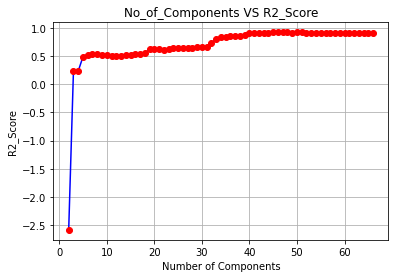

In [51]:
i_value=[]
r2_value=[]
for i in range(2,np.size(X,1)+1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    # Applying PCA
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    # Training And Testing the model
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    r2_value.append(r2_score(y_pred,y_test).round(4))
    i_value.append(i)
    
# Plotting the r2 Score with different number of components for PCA
plt.plot(i_value,r2_value,marker='o',mfc='red',mec='red',color='blue')
plt.xlabel('Number of Components')
plt.ylabel('R2_Score')
plt.title('No_of_Components VS R2_Score')
plt.grid(b=None)
plt.show()

In [52]:
# Applying PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
n=r2_value.index(max(r2_value))+2
pca = PCA(n_components = n)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [53]:
print(n)

46


The best number of components is 46. I will compare two different linear models.

In [54]:
model_name(LinearRegression())

explained_variance     :  0.94
r2   :  0.9385
MAE  :  1750.1887
MSE  :  7519631.0378
RMSE :  2742.1946


In [55]:
model_name(Lasso())

explained_variance     :  0.9395
r2   :  0.9379
MAE  :  1762.2198
MSE  :  7592572.7292
RMSE :  2755.4623


MSE is high which may be because we have a very small dataset.

#Conclusion

1. In ths dataset, we have information about 205 cars in the US to build a prediction model. Based on my research, I have imputed missing values manually and regression imputation method.

2. Before thrusting the dataset into a model, I removed multicollinearity in the dataset and compared different models with PCA and without PCA.

3. Linear Regression model with PCA looks like the best model so far to predict the price of cars. I can further fine tune the model to get better accuracy.